In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
import cv2

In [3]:
sns.set()
sns_blue = '#4d74af'
sns_bg = '#eaeaf2'

In [4]:
def gaussian_2D(x, y, mu, std, amp, offset):
  hx = np.exp(-0.5 * (x - mu[0]) ** 2 / std[0] ** 2)
  hy = np.exp(-0.5 * (y - mu[1]) ** 2 / std[1] ** 2)
  h = offset + (amp * hx * hy)
  return h

In [21]:
def fabric(x, y, radius, scl):
  h1 = gaussian_2D(x, y, [-2.7, -3.2], [2, 3], 0.5, 0)
  h2 = gaussian_2D(x, y, [-3, 3], [2, 2], 0.8, 0)
  h3 = gaussian_2D(x, y, [3, -3], [2.5, 3], 1.0, 0)
  h4 = gaussian_2D(x, y, [3.2, 3.3], [3, 2], 0.7, 0)
  return h1 + h2 + h3 + h4

In [9]:
def bowl_up(x, y, radius, scl):
  r = math.sqrt((x ** 2) + (y ** 2))
  if r > radius:
    x *= radius/r 
    y *= radius/r 
  return ((x * scl) ** 2 + (y * scl) ** 2)

In [10]:
def bowl_down(x, y, radius, scl):
  r = math.sqrt((x ** 2) + (y ** 2))
  if r > radius:
    x *= radius/r
    y *= radius/r 
  return -((x * scl) ** 2 + (y * scl) ** 2)

In [38]:
def saddle(x, y, radius, scl):
  return -((x * scl * 1.5) ** 2) + ((y * scl) ** 2)

In [35]:
def plateau(x, y, radius, scl):
  return 0

In [26]:
def draw_surface(height_func, view1, view2, scl, filename):
  side_size = 400 
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  radius = 5
  x = np.linspace(-radius, radius, side_size)
  y = np.linspace(-radius, radius, side_size)
  X, Y = np.meshgrid(x, y)
  xy_samples = [[px, py] for px in x for py in y]
  heights = [height_func(px, py, radius, scl) for px in x for py in y]
  heights = np.reshape(heights, (side_size, side_size)) 
  heights = heights.T
  p = ax.plot_surface(X, Y, heights, cmap='cool', edgecolors='black', linewidth=0.5)
  ax.view_init(view1, view2)
  ax.set_axis_off()
  ax.set_axis_off()
  plt.xticks([], [])
  plt.yticks([], [])
  ax.set_zticks([])
  plt.savefig(filename)
  plt.show()

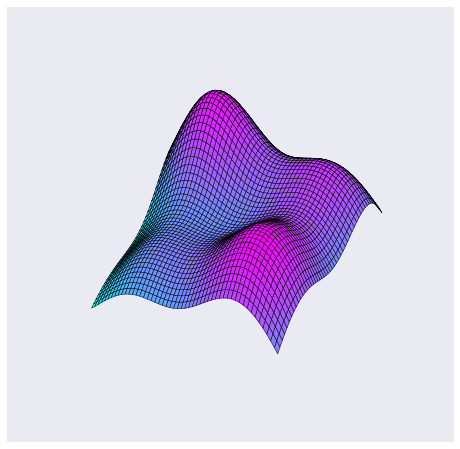

In [27]:
draw_surface(fabric, 60, -60, 1.0, 'fabric')

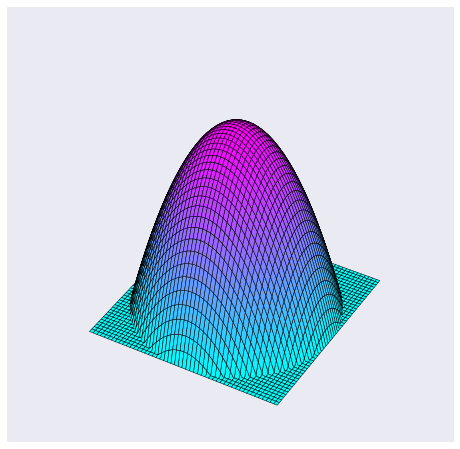

In [28]:
draw_surface(bowl_down, 40, -60, 3, 'bowl_down')

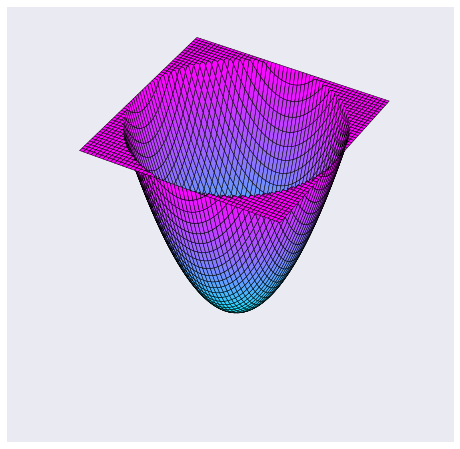

In [33]:
draw_surface(bowl_up, 40, -60, 3, 'bowl_up')

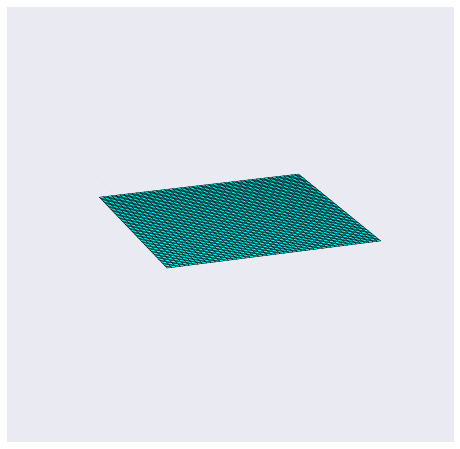

In [36]:
draw_surface(plateau, 20, -20, 3, 'plateau')

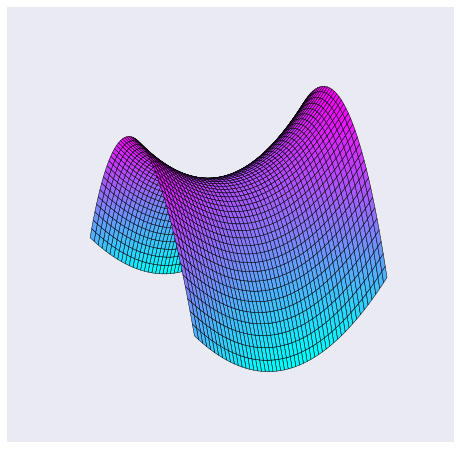

In [40]:
draw_surface(saddle, 30, -30, 3, 'saddle')